# Urban Computing Assignment 2 - Data Analysis
## Tong Ge 20314895

To run the code, please setup the anaconda environment by running the following code.
```bash
conda env create -f env.yaml
conda activate ML
```

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("sensor_data.csv", comment='#')
df.head()

,id,time,speed,altitude,latitude,longitude
0,1,1604853221525,0.000000,70.599998,53.353767,-6.256445
1,2,1604853223935,0.517189,70.599998,53.353913,-6.256675
2,3,1604853224965,0.598330,70.599998,53.353921,-6.256665
3,4,1604853227826,0.666202,70.612854,53.353951,-6.256732
4,5,1604853229172,0.684474,64.099998,53.353963,-6.256783


In [2]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

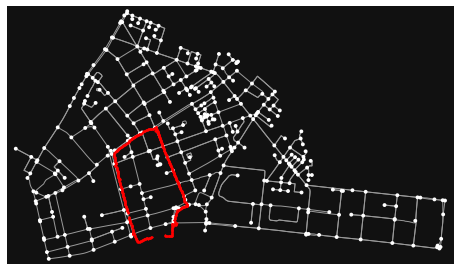

In [3]:
G = ox.graph_from_place('Dublin 1, Dublin, Ireland', network_type='drive')
fig, ax = ox.plot_graph(G, show=False, close=False)
ax.scatter(df["longitude"], df["latitude"], c='red', s=1)
plt.show()

In [4]:
df['delta_la'] = df["latitude"].diff().fillna(0) ** 2 
df['delta_lo'] = df["longitude"].diff().fillna(0) ** 2
df['delta_sum'] = np.sqrt(df['delta_la'] + df['delta_lo'])
corr = np.corrcoef(df['speed'], df['delta_sum'])

In [5]:
corr

array([[1.        , 0.02385546],
       [0.02385546, 1.        ]])

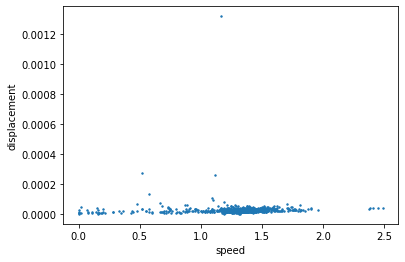

In [6]:
plt.scatter(df['speed'], df['delta_sum'], s=2)
plt.xlabel("speed")
plt.ylabel("displacement")
plt.show()